<a href="https://colab.research.google.com/github/anuragphalke09/Fraud-Detection-Using-Machine-Learning/blob/main/Fraud_Detection_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data_Loading and Data_Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [4]:
df.ffill(inplace=True)

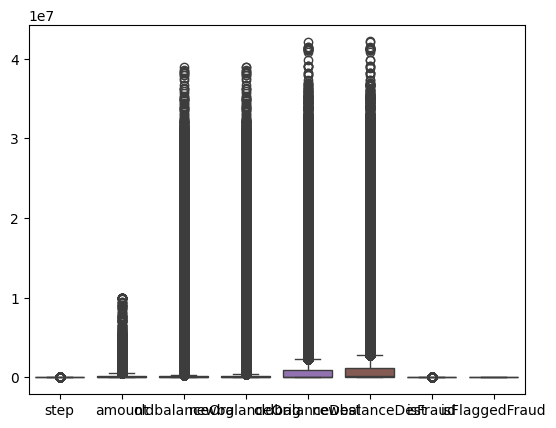

In [5]:
sns.boxplot(data=df.select_dtypes(include='number'))
plt.show()

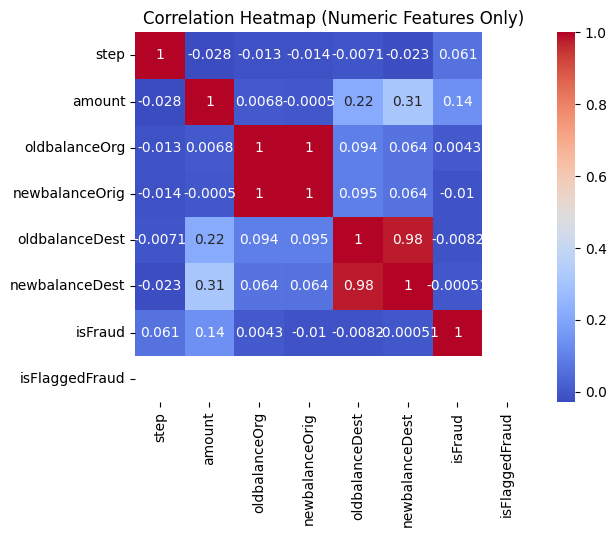

In [6]:
numeric_df = df.select_dtypes(include='number')

correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

Model Building

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [20]:
X = df.drop(['isFlaggedFraud', 'isFraud'], axis=1)
y = df['isFraud']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    212780
         1.0       1.00      0.80      0.89       278

    accuracy                           1.00    213058
   macro avg       1.00      0.90      0.94    213058
weighted avg       1.00      1.00      1.00    213058

[[212779      1]
 [    55    223]]


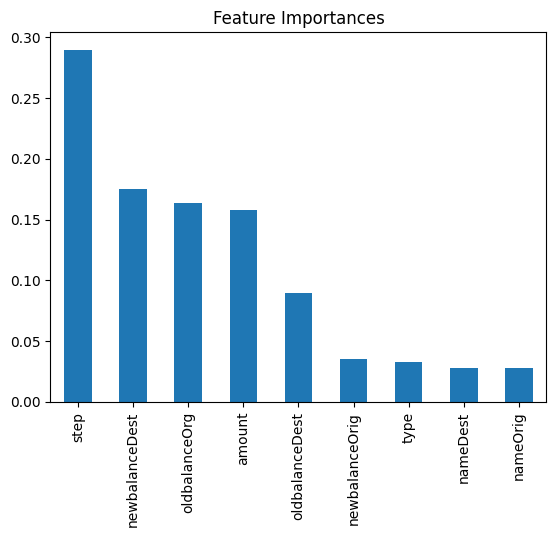

In [25]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances")
plt.show()